In [44]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import statsmodels.api as sm
import seaborn as sns
sns.set(font='IPAGothic')
import os


In [45]:
df=pd.read_csv('C:/Users/abhak/Documents/future_sale/campgeneSales.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [46]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [47]:
df.columns=['Month','Sales']
df.head()
df.shape

(107, 2)

In [48]:
#df.dropna(inplace=True)
df.drop(106,axis=0,inplace=True)
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [49]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [50]:
df.shape

(105, 2)

In [51]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [52]:
df.set_index(['Month'],inplace=True)
df.head()
#df.describe()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


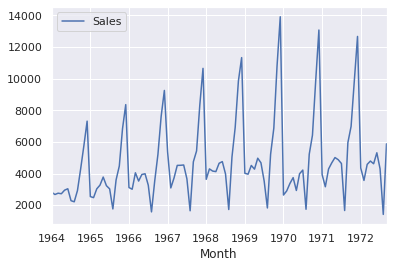

In [53]:
df.plot()
#data looks more like seasonal

In [54]:
#we will check the stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])


In [55]:
# hypothesi0= it is not statinary
#alternate hypothesis1=it is staionary
def adfuller_test(Sales):
    result=adfuller(Sales)
    lables=['Adf test Statistics','p-value','#lags used', 'Number of observations used']
    for value,lable in zip(result,lables):
        print(lable +':' +str(value))
        if result[1]<=0.05 :
            print('strong evidence against null hypothesis,reject the null hypothesis,data has no unit root and is stationary')
        else:
            print('weak evidence againt null hypothesis,time series has unit root,indicating it is non - stationary')
        

In [56]:
adfuller_test(df['Sales'])

Adf test Statistics:-1.8335930563276184
weak evidence againt null hypothesis,time series has unit root,indicating it is non - stationary
p-value:0.36391577166024713
weak evidence againt null hypothesis,time series has unit root,indicating it is non - stationary
#lags used:11
weak evidence againt null hypothesis,time series has unit root,indicating it is non - stationary
Number of observations used:93
weak evidence againt null hypothesis,time series has unit root,indicating it is non - stationary


In [57]:
# to make data statinary there are many ways . here i will use differencing
#df['Sales first difference']= df['Sales']- df['Sales'].shift(1),this we can do if data had no seasonality
df['Sesonal first difference']= df['Sales']- df['Sales'].shift(12)
df.head(14)

,Sales,Sesonal first difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [58]:
#test_result=adfuller(df['Sesonal first difference'])
adfuller_test(df['Sesonal first difference'].dropna())
#adfuller_test(df['Sesonal first difference'])

Adf test Statistics:-7.626619157213164
strong evidence against null hypothesis,reject the null hypothesis,data has no unit root and is stationary
p-value:2.060579696813685e-11
strong evidence against null hypothesis,reject the null hypothesis,data has no unit root and is stationary
#lags used:0
strong evidence against null hypothesis,reject the null hypothesis,data has no unit root and is stationary
Number of observations used:92
strong evidence against null hypothesis,reject the null hypothesis,data has no unit root and is stationary


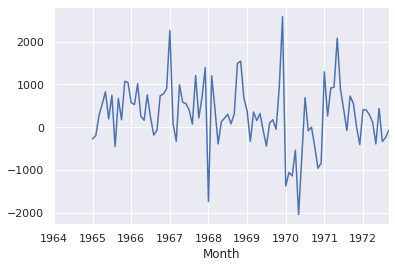

In [59]:
df['Sesonal first difference'].plot()

In [61]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

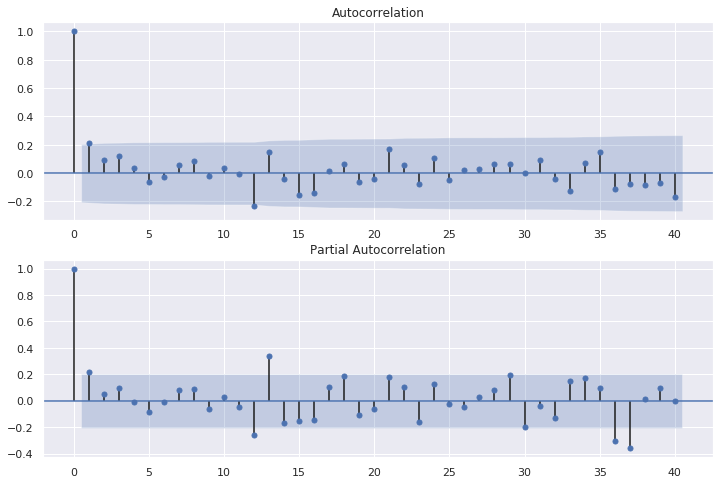

In [64]:
fig= plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Sesonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Sesonal first difference'].iloc[13:],lags=40,ax=ax2)

In [65]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(df['Sales'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 26 Feb 2021   AIC                           1910.251
Time:                        23:21:04   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7839     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

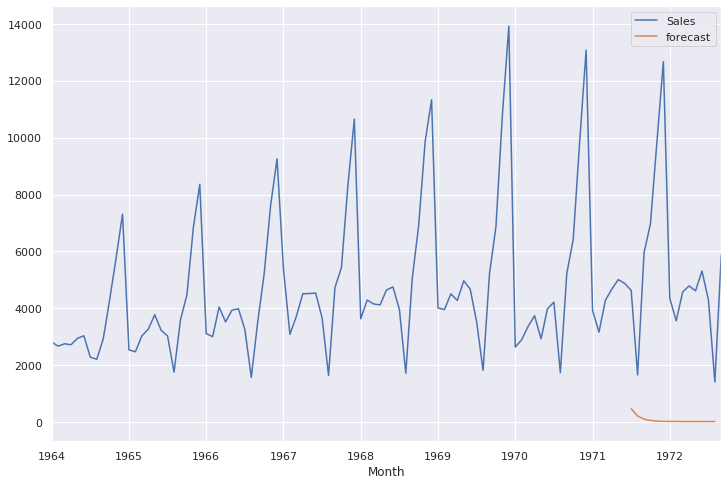

In [67]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
#above grap is not forcating properly as there is seasonality in it. so we will use sarima
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

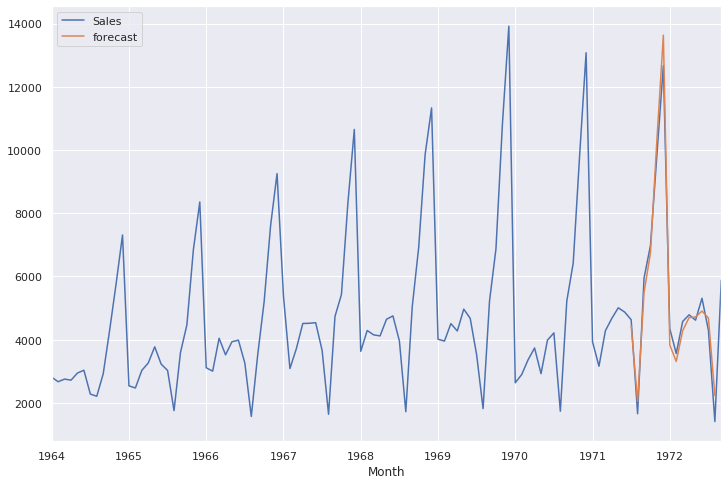

In [69]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [73]:
# now we will do future prediction
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [74]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [77]:
future_dates_df.tail()

,Sales,Sesonal first difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


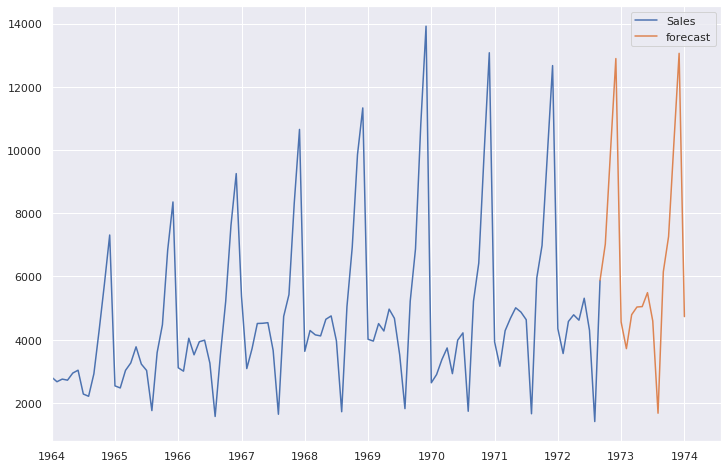

In [78]:
future_df=pd.concat([df,future_dates_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))